# Week 01 Assignment epileptic seizure

As a Data Scientist you often have lots of data at our disposal. Unfortunately, data from real-life cases is often not nicely structured. We need to manipulate the unstructured and/or messy data into a structured or clean form. We need to drop rows and columns because they are not needed for the analysis or because we cannot use them in case of too many missing values. Maybe we need to relabel columns or reformat characters into numerical values. Or we need to combine data from several sources. Cleaning and manipulating data into a structured form is called data preparation. In this week we will practice the cleaning and manipulation of EEG data in order to conduct graphical and statistical analysis. We will use tools often used by data scientists; `python`, `numpy`, `pandas` and `bokeh`. You will learn about data wrangling with `pandas` and `numpy` and you will learn to visualize with `bokeh`. Concretely, you will preprocess the brain EEG (electroencephalogram) data in an appropriate format in order to conduct statistical and visual analysis. 

Keywords: data loading, data inspection, data exploration, reshape data, data cleaning, timeseries, pandas, visualization, statistics, tidy table

More to read: 

- Andrzejak RG, Lehnertz K, Rieke C, Mormann F, David P, Elger CE (2001) Indications of nonlinear deterministic and finite dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state, Phys. Rev. E, 64, 061907

More about pandas and git:

- https://fennaf.gitbook.io/bfvm22prog1/
- https://opensourceuom.gitlab.io/blog/post_files/2022-02-23/git-essentials-cheatsheet.pdf
- https://nbviewer.org/github/ageron/handson-ml/blob/master/tools_pandas.ipynb
- https://github.com/fenna/BFVM22PROG1/blob/main/exercises/quiz_pandas.ipynb


Learning objectives

- Understand the concepts and benefits of vectorized manipulation 
- Understand the concepts of the visualization tool bokeh 
- Read, inspect, clean, and reshape a file into a tabular tidy format
- Perform visual and statistical analysis for time series data
- Maintain development environment 
- Apply coding standards and FAIR principles

By the end of this week the student can:

- load a tabular dataset and and rename the column names
- split a text column into two columns in Pandas DataFrame
- inspect the dataset for quality and metadata information
- reshape the dataset into a format suitable for visual and statistical analysis
- perform visual analysis
- perform statistical analysis

Please add your own topics you want to learn here: https://padlet.com/ffeenstra1/y97afib6ovx96lr9

A final plot will look like this:

<img src="../images/brain.png" alt="drawing" width="400"/>

The assignment consists of 6 parts:

- [part 1: load the data](#0)
     - [Exercise 1.1](#ex-11)
- [part 2: prepare for inspection](#1)
     - [Exercise 2.1](#ex-21)
- [part 3: inspect the data](#2)
     - [Exercise 3.1](#ex-31)
- [part 4: reshape the data](#3)
     - [Exercise 4.1](#ex-41)
     - [Exercise 4.3](#ex-43)
- [part 5: visualize the data](#4)
     - [Exercise 5.1](#ex-51)
- [part 6: statistical analysis](#5)
     - [Exercise 6.1](#ex-61)


Part 1 and 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 












## The Data
You will use a dataset called `eeg_data.csv`. This is a preprocessed dataset. The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for around 23 seconds. Each data point is the value of the EEG recording at a different point in time. There are in total 500 patients with each has 4097 datapoints.

The originial data was shuffled into 23 chunks per patient, each chunk contains 178 data points. 
The first column is an identifier with the chunk number (X1 ..X23) and the Patient number (for example V1.791)
The EEG recordings are X1, X2, ..., X178. The last column represents the label y {1,2,3,4,5}

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. 

Source: Andrzejak RG, Lehnertz K, Rieke C, Mormann F, David P, Elger CE (2001) Indications of nonlinear deterministic and finite dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state, Phys. Rev. E, 64, 061907


Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml


Run the cell below to load in the packages.

In [1]:
import yaml
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
#inspired by https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

def configReader(config_path):
    """
    This function open config.yaml file 
    and fetch the configue file information
    input: ...
    output: configue file
    """
    with open(config_path, "r") as file:
        config = yaml.safe_load(file)
    return config

<a name='0'></a>
## Part 1: Load the data

Instructions: Load the data and rename the unnamed column containing the identifier with the chunck number and the patientID into the column `ID`

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>pandas.read_csv() method can be used to read a csv file</li>
    <li>pandas.DataFrame.head() method is often used to inspect the dataframe</li>
    <li>pandas.DataFrame.rename() method can be used to rename columns</li>
</ul>
</details>

<a name='ex-11'></a>
### 1.1 Code your solution

In [3]:
# Parsing the yaml into Python object
config = configReader("../config.yaml")
# fetching the data path from config file
eeg = config["eeg"]

# opening the file in tabular format
df_eeg = pd.read_csv(eeg)
df_eeg.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5


In [4]:
# inspecting the dataset's shape
columns = df_eeg.columns
no_cols = len(columns)
shape = df_eeg.shape
print(f"number of columns: {no_cols},\n{columns.tolist()}")
print(f"The dataset shape: {shape}")

number of columns: 180,
['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134

In [5]:
# Renaming the Unnamed column to ID
df_eeg = df_eeg.rename(columns={"Unnamed: 0": "ID"})
df_eeg.head(3)


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5


---

### 1.2 Test your solution

In [6]:
#do not modify this cell, run cell to test your code
try:
    df_eeg.info()
except:
    print("df not properly loaded")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, ID to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


#### Expected outcome: 

The dataset should have 11500 entries (500patients x 23 rows per patient) and 180 columns (178 recordings, an identifier and the class variable y)

---

<a name='1'></a>
## Part 2: Prepare for inspection 

- Although the number of records suggest that there should be 500 patients with 23 record each we would like to check this.
- Furthermore we do not know whether the y label is the same for each patient.
- We also do not know whether there are missing values.
- In order to answer the questions above it is more convient to split up the identifier containing a combination of chunck number and patient ID into two separate columns.

After that we can do some inspections.

Instructions: 

- change the `ID` column into two separate columns `idx` and `patient_id`
- change the column `idx` into a number (you need to stripe the X first)
- remove the `ID` column from the DataFrame


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>pandas.DataFrame.str.split() method can be used to split</li>
    <li>pandas.DataFrame.astype(int) method can be used to typecast to a number</li>
    <li>pandas.DataFrame.drop() method can be used to drop a column</li>
</ul>
</details>

<a name='ex-21'></a>
### 2.1 Code your solution

In [7]:
# checking for each columns type
columns_type = df_eeg.dtypes.value_counts()
print(f"Columns type: {columns_type}")

Columns type: int64     179
object      1
Name: count, dtype: int64


In [8]:
# spliting the ID column into two separate columns "idx" and 
ndf_eeg = df_eeg.copy()
ndf_eeg[["idx", "patient_id"]] = ndf_eeg["ID"].str.split(".", n=1, expand=True)
ndf_eeg = ndf_eeg.drop(columns=["ID"])

# Reordering the columns for better readability.
ndf_eeg = ndf_eeg[["patient_id", "idx"] + [col for col in ndf_eeg.columns if col not in ["idx", "patient_id"]]]
ndf_eeg.head(3)

,patient_id,idx,X1,X2,X3,X4,X5,X6,X7,X8,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,V1.791,X21,135,190,229,223,192,125,55,-9,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,V1.924,X15,386,382,356,331,320,315,307,272,...,164,150,146,152,157,156,154,143,129,1
2,V1.1,X8,-32,-39,-47,-37,-32,-36,-57,-73,...,57,64,48,19,-12,-30,-35,-35,-36,5


In [ ]:
# Removing (strip) the X from the  values in idx 
ndf_eeg["idx"] = ndf_eeg["idx"].astype(str).str.strip("X").astype('int64')
print(ndf_eeg.head(3))
print(f"idx column type: {ndf_eeg['idx'].dtype}")

  patient_id  idx   X1   X2   X3   X4   X5   X6   X7   X8  ...  X170  X171  \
0     V1.791   21  135  190  229  223  192  125   55   -9  ...   -17   -15   
1     V1.924   15  386  382  356  331  320  315  307  272  ...   164   150   
2       V1.1    8  -32  -39  -47  -37  -32  -36  -57  -73  ...    57    64   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  

[3 rows x 181 columns]
idx column type: int64


In [10]:
# newColumns = df["ID"].str.split(".", 1, expand = True )
# #Erase 'X' from the begining of idx column and assign names
# newColumns[0] = newColumns[0].str.replace("X","")
# newColumns[0] = newColumns[0].astype(np.dtype("int64"))
# newColumns[0].name ="idx"
# newColumns[1].name = "patient_id" 

# df.insert(1, newColumns[0].name, newColumns[0])
# df.insert(2, newColumns[1].name, newColumns[1])b
# df = df.drop( "ID", axis='columns')

# df

---

### 2.2 Test your solution

In [11]:
#do not modify this cell, run cell to test your code
try:
    print(ndf_eeg.dtypes)
except:
    print("df not properly loaded")

patient_id    object
idx            int64
X1             int64
X2             int64
X3             int64
               ...  
X175           int64
X176           int64
X177           int64
X178           int64
y              int64
Length: 181, dtype: object


#### expected outcome:


---

<a name='2'></a>
## Part 3: Inspect the data

Now that we prepared the data we are going to inspect the data to get more familiar with the data. You are required to do the following

- inspect how many patients are in the dataset (should be 500 different)
- inspect if patient V1.924 has 23 records
- check if a patient has more than 1 Y value
- check for how many patients are there per level
- check if there are missing values

The code for the inspection of the chunk numbers is given.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>pandas.DataFrame.groupby()</li>
    <li>(df[df['columnname'] == value])</li>
    <li>if you sum the expression ['y'].min() == ['y'].max() when grouped by patient it should return 500</li>
</ul>
</details>


<a name='ex-31'></a>
### 3.1 Code your solution

In [12]:
# inspect how many unique patient_id are in the dataset

nrof_patients = ndf_eeg['patient_id'].nunique()
# nrof_patients = len(ndf_eeg['patient_id'].unique())
# nrof_patients = len(ndf_eeg.groupby('patient_id'))
print(f"number of patients in the dataset: {nrof_patients}")

number of patients in the dataset: 500


In [13]:
# to see whether the patient V1.924 has 23 records.
patient_V1924 = len(ndf_eeg[ndf_eeg['patient_id'] == 'V1.924'])
print(f"the number of records for the patient v1.924: {patient_V1924}")

the number of records for the patient v1.924: 23


In [14]:
# whether the are only one y value for each patient

patients_ynr = ndf_eeg.groupby('patient_id')['y'].nunique()

print(patients_ynr)

# Check if all patients have exactly one unique y value
if (patients_ynr == 1).all():
    print("All patients have only one unique y value.")
else:
    print("Some patients have more than one y value.")

patient_id
V1        1
V1.1      1
V1.10     1
V1.101    1
V1.102    1
         ..
V1.994    1
V11       1
V12       1
V13       1
V14       1
Name: y, Length: 500, dtype: int64
All patients have only one unique y value.


In [15]:
# the number of patients at each level (y)
nrpatients_perlevel = ndf_eeg.groupby('y')['patient_id'].nunique()
print(f"Number of patinets at each level (y):\n{nrpatients_perlevel}")

Number of patinets at each level (y):
y
1    100
2    100
3    100
4    100
5    100
Name: patient_id, dtype: int64


In [16]:
# Check for any missing values in the dataset
missing_values = ndf_eeg.isnull().sum().sum()
print(f"Number of missing values in the dataset = {missing_values}")

Number of missing values in the dataset = 0


In [17]:
# #- inspect if patient V1.924 has 23 records
# chunkNumOfPatV1924 = len(df[df["patient_id"] == "V1.924"])
# print(f'patient V1.924 has {chunkNumOfPatV1924} chunks\n')

# #- check if a patient has more than 1 Y value
# maxValues = pd.DataFrame(df.groupby('patient_id').max())
# minValues = pd.DataFrame(df.groupby('patient_id').min())
# patMoreY = len(maxValues[maxValues["y"] != minValues["y"]])
# print(f'There are {patMoreY} patients with more than one Y\n')

# #- check for how many patients are there per level
# meanValue = pd.DataFrame(df.groupby(["patient_id"]).mean())
# levelSize = meanValue.groupby("y").size()
# print(f'the number of patients per level:\n{levelSize}\n')

# #- check if there are missing values
# nullFinder = df.isnull().sum()
# nullSum = len(nullFinder[nullFinder > 0])
# print(f'the number of null values is: {nullSum}' )



---

<a name='3'></a>
## Part 4: Reshape the data

We would like to plot the patient data.
- Therefore we would need to reshape the data.
- For plotting purpose the data of the 23 chunks need to be ordered by patient and chunk number first.
- And then we need to get the X1..X178 data (a matrix with shape 23, 178) to be reshaped to one array of 178 * 23 = 4094 datapoints. (shape 1, 4094).
- The 4094 datapoint array is the EEG signal data of a particular patient to be plotted on the y-axis. On the x-axis we simply can create a sequence from 1 to 4094. 


Instructions:

- set the index to `patient_id` and `idx`
- sort the index
- create a timesequence from 1 to 4094
- finish the code to select a patient
- finish the code to get the data of a patient and reshape it into an one dimensional array


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>df.set_index</li>
    <li>df.sort_index</li>
    <li>use np.arange to create the sequence and use tolist to transfer it to a list</li>
    <li>check pandas.DataFrame.iloc and slicing options for selecting a subset of the data</li>
    <li>with numpy.reshape you can reshape a matrix</li>
</ul>
</details>

<a name='ex-41'></a>
### 4.1 Code your solution

In [18]:
# # To set 'idx' and 'patient_id' as index
# ndf_eeg = ndf_eeg.reset_index()
# ndf_eeg = ndf_eeg.set_index(['patient_id', 'idx'])
# ndf_eeg.head(3)

In [19]:
# # Sorting thr index.
# ndf_eeg = ndf_eeg.sort_index()
# ndf_eeg.head(5)

In [20]:
# Group patients by their ids. (Just for inspection)
grouped_patients = ndf_eeg.groupby('patient_id')
# print(grouped_patients.value_counts())

In [62]:
# Group by 'y'(level) and 'patient_id' to access patient data within each level.
grouped_by_y = ndf_eeg.groupby(['y', 'patient_id'])
grouped_by_y.value_counts().head(5)

y  patient_id  idx  X1    X2    X3    X4    X5    X6    X7    X8    X9    X10   X11   X12   X13   X14   X15    X16   X17   X18   X19   X20   X21   X22   X23   X24   X25   X26   X27   X28   X29   X30   X31   X32   X33   X34   X35   X36   X37   X38   X39   X40   X41   X42   X43   X44   X45   X46   X47   X48   X49   X50    X51    X52    X53   X54   X55    X56   X57   X58   X59   X60   X61   X62   X63   X64   X65   X66   X67   X68    X69    X70   X71   X72   X73   X74   X75    X76   X77   X78   X79   X80   X81   X82   X83    X84    X85   X86   X87   X88    X89   X90   X91   X92   X93    X94    X95   X96   X97   X98   X99   X100  X101  X102  X103  X104  X105  X106  X107  X108  X109  X110  X111  X112  X113  X114   X115   X116  X117  X118  X119  X120  X121  X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133   X134   X135   X136  X137  X138  X139  X140  X141  X142   X143   X144   X145  X146  X147  X148  X149  X150  X151  X152  X153  X154  X155  X156  X157  X158  X159  X160 

In [22]:
# The following functions access each patients data regarding its level.
# First function fetches a specified patient's data points (the patient's id is known) from the grouped patients dictionary.
# Second function fetches patients data by level (all the patients from that level) from the grouped patients dictionary.
# Third function fetches a specified number of patients data points\
#   from a specific level's data dictionary (e.g, the first 10 patients from level 4).

def fetch_patients_by_id(grouped_patients_dict, patient_id):
    """
    This function fetches a specified patient's data points from the grouped patients dictionary.
    input: grouped_patients_dict: dictionary, patient_id: str
    output: grouped_by_level: dictionary
    """
    grouped_by_level = {}
    for key, value in grouped_patients_dict:
        if key[1] == patient_id:
            grouped_by_level[key] = value
    return grouped_by_level



def fetch_patients_by_level(grouped_patients_dict, level):
    """
    this function fetches patients data by level from the grouped patients dictionary.
    input: grouped_patients_dict: dictionary, level: int
    output: grouped_by_level: dictionary
    """
    grouped_by_level = {}
    for key, value in grouped_patients_dict:
        if key[0] == level:
            grouped_by_level[key] = value
    return grouped_by_level



def fetch_patients_from_level(level_dict, number_of_patients):
    """
    this function fetches a specified number of patients data points from the data dictionary.
    input: data_dict: dictionary, number_of_patients: int
    output: groups: list
    """
    groups = {}
    # Iterate over each patient ID in the dictionary
    for level, group in list(level_dict.items())[:number_of_patients]:
        groups[level] = group
    return groups

In [23]:
# fetch specific patient data points.
patient_v11 = fetch_patients_by_id(grouped_by_y, 'V1.1')
patient_v11.keys()

dict_keys([(5, 'V1.1')])

In [24]:
# fetch all patients data points from a specific level.
level_01 = fetch_patients_by_level(grouped_by_y, 1)
level_02 = fetch_patients_by_level(grouped_by_y, 2)
level_03 = fetch_patients_by_level(grouped_by_y, 3)
level_04 = fetch_patients_by_level(grouped_by_y, 4)
level_05 = fetch_patients_by_level(grouped_by_y, 5)
print(len(level_03))
print(level_04.keys())
# print(level_04.values())

100
dict_keys([(4, 'V1.101'), (4, 'V1.110'), (4, 'V1.111'), (4, 'V1.121'), (4, 'V1.131'), (4, 'V1.141'), (4, 'V1.151'), (4, 'V1.161'), (4, 'V1.171'), (4, 'V1.181'), (4, 'V1.191'), (4, 'V1.201'), (4, 'V1.210'), (4, 'V1.211'), (4, 'V1.221'), (4, 'V1.231'), (4, 'V1.241'), (4, 'V1.251'), (4, 'V1.261'), (4, 'V1.271'), (4, 'V1.281'), (4, 'V1.291'), (4, 'V1.301'), (4, 'V1.310'), (4, 'V1.311'), (4, 'V1.321'), (4, 'V1.331'), (4, 'V1.341'), (4, 'V1.351'), (4, 'V1.361'), (4, 'V1.371'), (4, 'V1.381'), (4, 'V1.391'), (4, 'V1.401'), (4, 'V1.410'), (4, 'V1.411'), (4, 'V1.421'), (4, 'V1.431'), (4, 'V1.441'), (4, 'V1.451'), (4, 'V1.461'), (4, 'V1.471'), (4, 'V1.481'), (4, 'V1.491'), (4, 'V1.501'), (4, 'V1.510'), (4, 'V1.511'), (4, 'V1.521'), (4, 'V1.531'), (4, 'V1.541'), (4, 'V1.551'), (4, 'V1.561'), (4, 'V1.571'), (4, 'V1.581'), (4, 'V1.591'), (4, 'V1.601'), (4, 'V1.610'), (4, 'V1.611'), (4, 'V1.621'), (4, 'V1.631'), (4, 'V1.641'), (4, 'V1.651'), (4, 'V1.661'), (4, 'V1.671'), (4, 'V1.681'), (4, 'V1.69

In [53]:
# fetch a specified number of patients data points from a specific level.
sixpat_level_01 = fetch_patients_from_level(level_01, 6)
sixpat_level_01.keys()

dict_keys([(1, 'V1.104'), (1, 'V1.116'), (1, 'V1.117'), (1, 'V1.124'), (1, 'V1.134'), (1, 'V1.144')])

In [26]:
# to inspect each level's patients.
# Extract the first part of the key (since all first parts are the same)
first_part = next(iter(level_01))[0]

# Extract the second parts of the keys
second_parts = [key[1] for key in level_01.keys()]

# Output the result in the desired format
print(first_part, second_parts, len(second_parts), sep='\n')

1
['V1.104', 'V1.116', 'V1.117', 'V1.124', 'V1.134', 'V1.144', 'V1.154', 'V1.164', 'V1.174', 'V1.184', 'V1.194', 'V1.204', 'V1.216', 'V1.217', 'V1.224', 'V1.234', 'V1.244', 'V1.254', 'V1.264', 'V1.274', 'V1.284', 'V1.294', 'V1.304', 'V1.316', 'V1.317', 'V1.324', 'V1.334', 'V1.344', 'V1.354', 'V1.364', 'V1.374', 'V1.384', 'V1.394', 'V1.404', 'V1.416', 'V1.417', 'V1.424', 'V1.434', 'V1.444', 'V1.454', 'V1.464', 'V1.474', 'V1.484', 'V1.494', 'V1.504', 'V1.516', 'V1.517', 'V1.524', 'V1.534', 'V1.544', 'V1.554', 'V1.564', 'V1.574', 'V1.584', 'V1.594', 'V1.604', 'V1.616', 'V1.617', 'V1.624', 'V1.634', 'V1.644', 'V1.654', 'V1.664', 'V1.674', 'V1.684', 'V1.694', 'V1.704', 'V1.716', 'V1.717', 'V1.724', 'V1.734', 'V1.744', 'V1.754', 'V1.764', 'V1.774', 'V1.784', 'V1.794', 'V1.804', 'V1.816', 'V1.817', 'V1.824', 'V1.834', 'V1.844', 'V1.854', 'V1.864', 'V1.874', 'V1.884', 'V1.894', 'V1.904', 'V1.916', 'V1.917', 'V1.924', 'V1.934', 'V1.944', 'V1.954', 'V1.964', 'V1.974', 'V1.984', 'V1.994', 'V14']


In [27]:
#change this, should return a list with values 1..4094
timeseq = np.arange(1,4095).tolist()
len(timeseq)

4094

---

### 4.2 Test your solution

In [28]:
# #check outcome df and timeseq, do not modify this cell, run to test
# print(df.head(2))
# print(f'the length of timeseq [{np.array(timeseq).min()}..{np.array(timeseq).max()}] is {len(timeseq)}')

#### expected outcome:


---
Now that we reorganized the patients we could use the new dataframe to select a patient, load the values in an numpy matrix and reshape that to a one dimensional array. To do such complete the code below

<a name='ex-43'></a>
### 4.3 Code your solution

In [29]:
# #get the data of one patient
# def get_patient(df, patient):
#     """
#     explanation: this function slice the 
#                  data frame for a patient.
#     input: 1- data frame(df)
#            2- patient_id(patient) 
#     output: data frame of the patient
#     """
#     ##########################
#     dfpat = df.loc[patient].iloc[:,:178] 
#     #########################
#     return dfpat.sort_index()


# #fetch the values part and put in numpy array
# def get_values(df):
#     """
#     explanation: it converts df to ndarray for 
#                  each patient.
#     input: data frame(df)
#     output: a patient ndarray
#     """
#     ###############################
#     X = np.array(df)
#     ###############################
#     n = int(len(df) / 23)
#     X = X.reshape(n, 4094)
#     return X


In [30]:
# To create a timeseries array for each patient.
def reshape_patients_data(grouped_patients):
    """
    This function reshapes the patients data into a timeseries array.
    input: grouped_patients: dictionary
    output: patients_timeseries: dictionary
    """
    patients_timeseries = {}
    # Loop through the grouped patients and save each patient's data in the dictionary.
    for patient_id, group in grouped_patients.items():
        patient_timeseries = group.iloc[:, 2:180].values
        reshaped_array = patient_timeseries.flatten()
        patients_timeseries[patient_id] = reshaped_array

    return patients_timeseries

In [31]:
xrt = reshape_patients_data(sixpat_level_01)

for key, value in xrt.items():
    # print(key, value)
    # print(len(value))
    values = value
    print(values)

[ 142  262  382 ... -346 -365 -398]
[-311  162  506 ... -368 -616 -569]
[-116 -114 -142 ... -331 -313 -265]
[  19  -77 -262 ... -630 -592 -667]
[-264 -189 -117 ...   -3  -13  -20]
[-27 -19 -20 ... -92 -24  38]


---
### 4.4 Test your solution

In [32]:
# #check outcome of array, do not modify this cell, run to test
# test_patient = get_values(get_patient(df,'V1.334'))[0]
# print(f'the length of patient V1.334 array {test_patient} = {len(test_patient)}')

### expected outcome

---

<a name='4'></a>
## Part 5: Plot the data

- In this part we will first select some patients per class level in the function `get_data(level)`.
- Then we are going to plot two plots per level using bokeh.
- Your job is to finish the code of the bokeh plot. For each patient eeg signal should be plotted on the y-axis given the timesequence on the x-axis

In [33]:
# #code to select some patients per level, do not modify this cell, run this cell
# #it is allowed though to add some print statements in order to understand what is happening
# def get_data(level):
#     df_level = df[df['y']==level]
#     s = df_level.index.unique().tolist()
#     patients = np.array(sorted(set([x[0] for x in s]))).tolist()
#     return list(patients)[3:5]

# p1 = get_data(1)
# p2 = get_data(2)
# p3 = get_data(3)
# p4 = get_data(4)
# p5 = get_data(5)

<a name='ex-51'></a>
### 5.1 Code your solution

In [52]:
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import Range1d

def make_plot(title, y, pat_values, timeseq, color):
    p = figure(title=title, background_fill_color="#fafafa")
    p.y_range=Range1d(-1500, 1500)
    
    ###########################################
    p.line(timeseq, pat_values, legend_label= f"level{y}", line_width=0.5, color=color) 
    ###########################################

    p.xaxis.axis_label = 'time'
    p.yaxis.axis_label = 'signal'
    p.grid.grid_line_color="white"
    return p


def make_plot_array(g, pa, y):
    d = {1:'seizure', 2:'tumor location', 3:'non-tumor location', 4:'eyes closed', 5:'eyes open'}
    for i, v in reshape_patients_data(pa).items():
        p = make_plot(title = f'brain EEG for patient {i} {d[y]}', y=y, pat_values=v, timeseq=timeseq, color='black')
        g.append(p)
    return g

g = []
g = make_plot_array(g, sixpat_level_01, 1)
# # g = make_plot_array(g, p2, 2)
# # g = make_plot_array(g, p3, 3)
# # g = make_plot_array(g, p4, 4)
# # g = make_plot_array(g, p5, 5)
    
show(gridplot(g, ncols=2, width=450, height=300))

In [36]:
# from bokeh.plotting import figure, show
# from bokeh.layouts import gridplot
# from bokeh.models import Range1d

# def make_plot(title, y, pat_values, timeseq, color):
#     p = figure(title=title, background_fill_color="#fafafa")
#     p.y_range=Range1d(-1500, 1500)
    
#     ###########################################
#     p.line(timeseq, pat_values, legend_label= f"level{y}", line_width=0.5, color=color) 
#     ###########################################

#     p.xaxis.axis_label = 'time'
#     p.yaxis.axis_label = 'signal'
#     p.grid.grid_line_color="white"
#     return p


# def make_plot_array(g, pa, y):
#     d = {1:'seizure', 2:'tumor location', 3:'non-tumor location', 4:'eyes closed', 5:'eyes open'}
#     for i in pa:
#         v = get_values(get_patient(df,i))[0]
#         p = make_plot(title = f'brain EEG for patient {i} {d[y]}', y=y, pat_values=v, timeseq=timeseq, color='black')
#         g.append(p)
#     return g

# g = []
# g = make_plot_array(g, p1, 1)
# g = make_plot_array(g, p2, 2)
# g = make_plot_array(g, p3, 3)
# g = make_plot_array(g, p4, 4)
# g = make_plot_array(g, p5, 5)
    
# show(gridplot(g, ncols=2, plot_width=450, plot_height=300))

---

<a name='5'></a>
## Part 6: Statistical analysis (bonus points)

From the graphical analysis is seems that there is significant difference between level 1 and the other levels. We can use `pandas.DataFrame.melt` to prepare the data for statistical analysis. Your job is to give statistical evidence of a significant difference see also [gitbook example](https://fennaf.gitbook.io/bfvm19prog1/data-wrangling/reshape-with-melt)

<a name='ex-61'></a>
### 6.1 Code your solution

In [37]:
#inspired from https://fennaf.gitbook.io/bfvm19prog1/data-wrangling/reshape-with-melt
# I calculated other statistical attributes such as mean, median, variance, and standard deviation.
# But the statistical difference between levels appears most in variance and standard deviation. 

dfMelt = df.melt(id_vars=['y'])
dfmStd = dfMelt.groupby('y').std()
dfmVar = dfMelt.groupby('y').var()

print(f'the vaiance table for different levels:\n{dfmVar}\n')
print(f'the standard deviation table for different levels:\n{dfmStd}\n')




NameError: name 'df' is not defined

<AxesSubplot:xlabel='y', ylabel='value'>

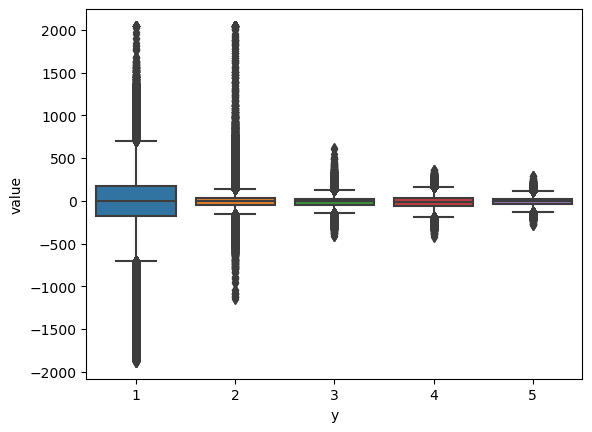

In [89]:
#Here I plot a boxplot to show the variation of the data in different level 
sns.boxplot(x = dfMelt.y, y = dfMelt.value)